In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,237799.0,NaN,0.748942,0.511234,0.002913,0.0,0.173803,-8.853673,0,0.078060,168.262924,3,0.178159,0
39996,39996,191119.0,0.067488,0.672830,0.889685,0.001225,5.0,0.122924,-7.798993,0,0.188607,110.684544,3,0.790626,0
39997,39997,160879.0,0.877431,0.409065,0.292671,NaN,10.0,0.110664,-15.378585,0,0.031294,99.556074,3,0.177947,1
39998,39998,193918.0,NaN,0.365738,NaN,0.000339,1.0,0.356308,-4.661977,1,0.054096,139.857384,3,0.772978,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
id                  40000 non-null int64
song_duration_ms    35899 non-null float64
acousticness        36008 non-null float64
danceability        35974 non-null float64
energy              36025 non-null float64
instrumentalness    36015 non-null float64
key                 35935 non-null float64
liveness            35914 non-null float64
loudness            36043 non-null float64
audio_mode          40000 non-null int64
speechiness         40000 non-null float64
tempo               40000 non-null float64
time_signature      40000 non-null int64
audio_valence       40000 non-null float64
song_popularity     40000 non-null int64
dtypes: float64(11), int64(4)
memory usage: 4.6 MB


## Check for NANs

In [7]:
train_df.isnull().sum()

id                     0
song_duration_ms    4101
acousticness        3992
danceability        4026
energy              3975
instrumentalness    3985
key                 4065
liveness            4086
loudness            3957
audio_mode             0
speechiness            0
tempo                  0
time_signature         0
audio_valence          0
song_popularity        0
dtype: int64

In [9]:
train_df_drop_na = train_df.dropna(axis=0)

In [10]:
train_df_drop_na.describe()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000
mean,19962.571122,193358.986094,0.277111,0.571251,0.684489,0.035647,5.035576,0.198954,-7.378523,0.322788,0.093469,116.809187,3.397184,0.581972,0.365201
std,11520.271716,45874.796177,0.298536,0.190446,0.212942,0.148039,3.376328,0.152021,3.871002,0.467556,0.082315,26.163530,0.524866,0.237401,0.481500
min,3.000000,25658.000000,-0.011000,0.043961,-0.001682,-0.004398,0.000000,0.030298,-30.170399,0.000000,0.015065,62.055779,2.000000,0.013398,0.000000
25%,9928.000000,166184.000000,0.039089,0.424551,0.541085,0.000938,2.000000,0.111769,-9.506172,0.000000,0.038470,97.235864,3.000000,0.400503,0.000000
50%,20037.000000,186768.000000,0.140563,0.609771,0.705080,0.001969,5.000000,0.136033,-6.309642,0.000000,0.055876,113.819685,3.000000,0.600472,0.000000
75%,29879.500000,215646.500000,0.485879,0.718007,0.870843,0.003227,8.000000,0.214039,-4.593041,1.000000,0.117994,128.601471,4.000000,0.761275,1.000000
max,39999.000000,491671.000000,1.062516,0.954945,1.033747,1.075415,11.000000,0.979632,-0.877346,1.000000,0.560748,212.425482,5.000000,1.018302,1.000000


In [12]:
X = train_df_drop_na.drop(columns=['song_popularity'])
y = train_df_drop_na['song_popularity']

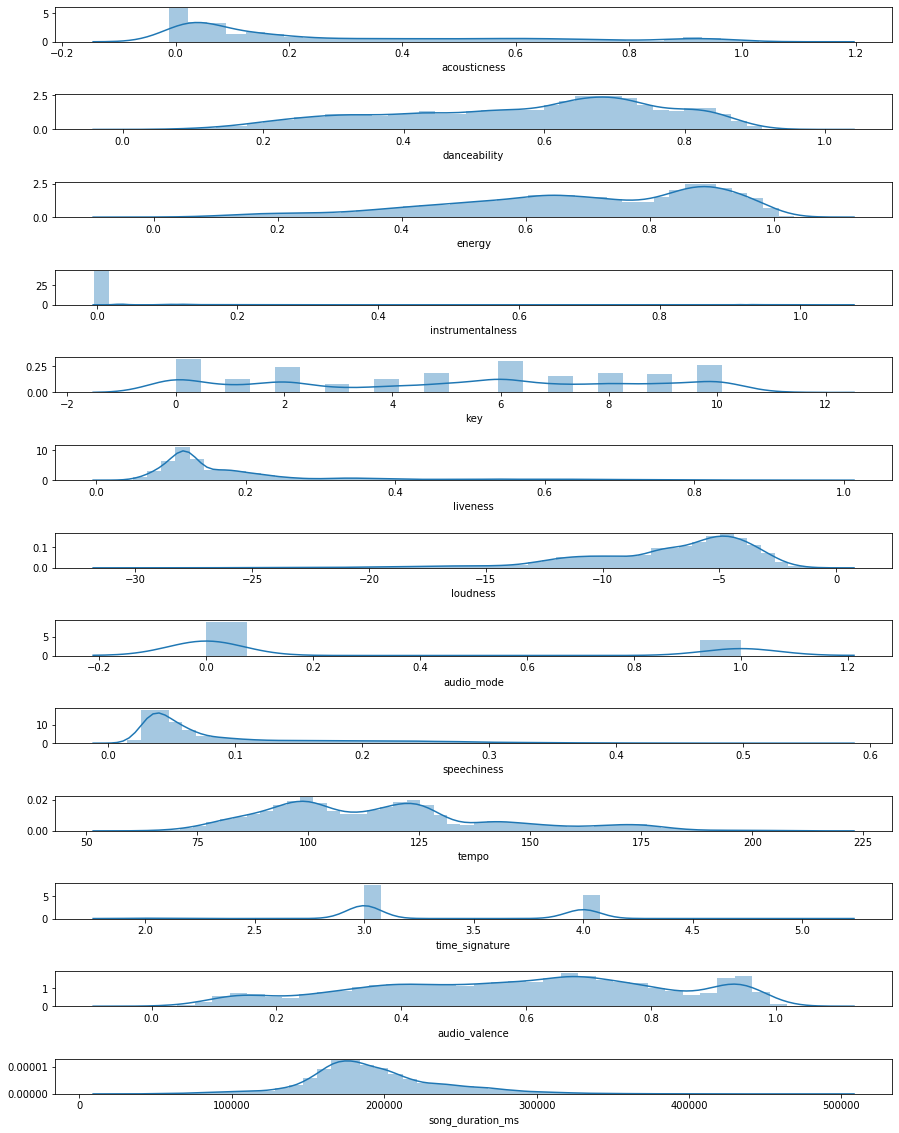

In [22]:
fig, ax = plt.subplots(13, 1, figsize=(15,20))
plt.subplots_adjust(hspace=1.5)
for i,col in enumerate(X.columns[1:]):
    sns.distplot(X[col], ax=ax[i-1])

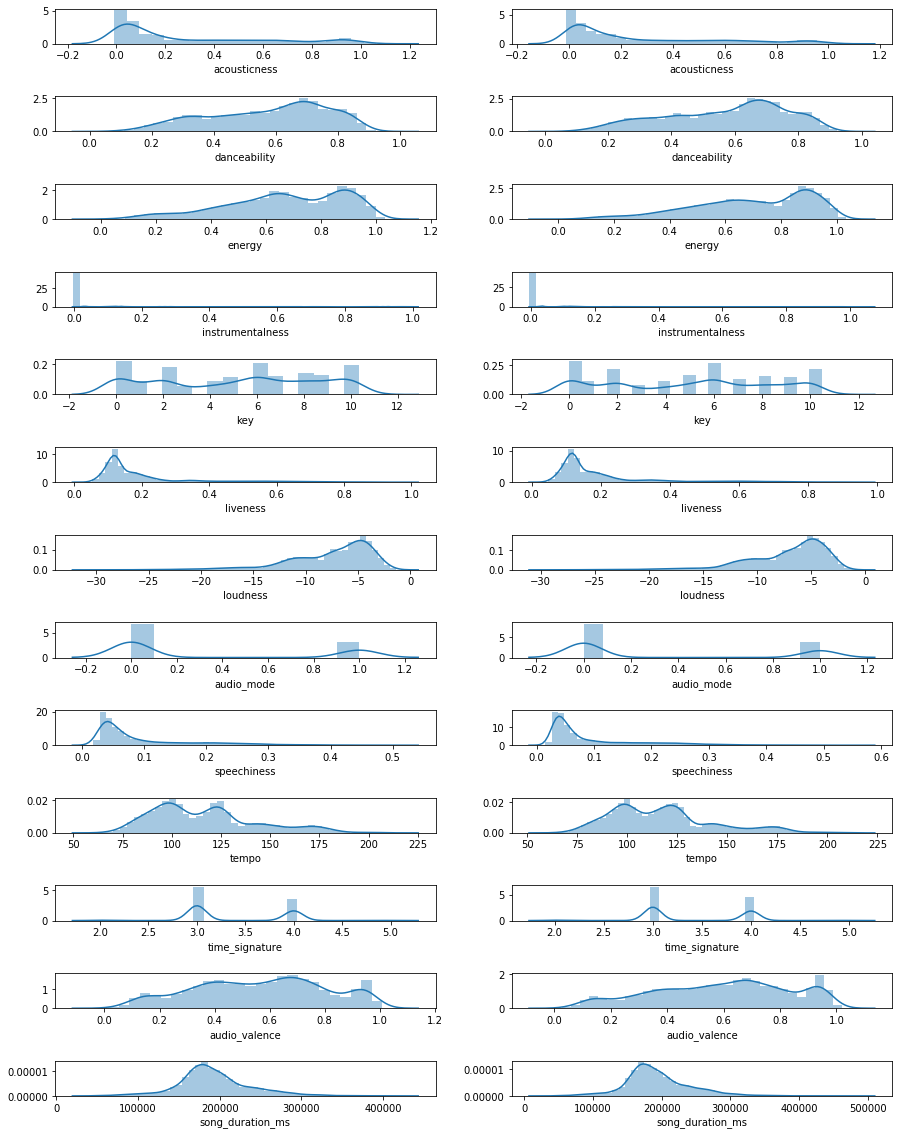

In [26]:
fig, ax = plt.subplots(13, 2, figsize=(15,20))
plt.subplots_adjust(hspace=1.5)
for i,col in enumerate(X.columns[1:]):
    sns.distplot(train_df_drop_na[train_df_drop_na['song_popularity']==1][col], ax=ax[i-1,0])
    sns.distplot(train_df_drop_na[train_df_drop_na['song_popularity']==0][col], ax=ax[i-1,1])

In [ ]:
fig, ax = plt.subplots(13, 1, figsize=(15,20))
plt.subplots_adjust(hspace=1.5)
for i,col in enumerate(X.columns[1:]):
    sns.boxplot(X[col],y, ax=ax[i-1])